# Loan Approval Classification Project

by Merveille Kuendzong

## Introduction

The Loan Data dataset from Kaggle contains 45,000 records detailing loan applicants' demographic, financial, and credit information, as well as loan-specific characteristics and outcomes. It combines numerical and categorical data, providing insights into factors such as income, credit history, loan intent, and defaults that may influence loan approval decisions.

Link to the dataset: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier



In [2]:
data = pd.read_csv("loan_data.csv")
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
data.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


There are no null values in the dataset.

In [4]:
data.shape

(45000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [7]:
#@title List of education levels
data['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [8]:
#@title List of home ownership categories
data['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [9]:
#@title List of genders
data['person_gender'].unique()

array(['female', 'male'], dtype=object)

In [10]:
#@title List of loan intents
data['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [11]:
data['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
data['loan_status'].value_counts()

,count
loan_status,
0,35000
1,10000


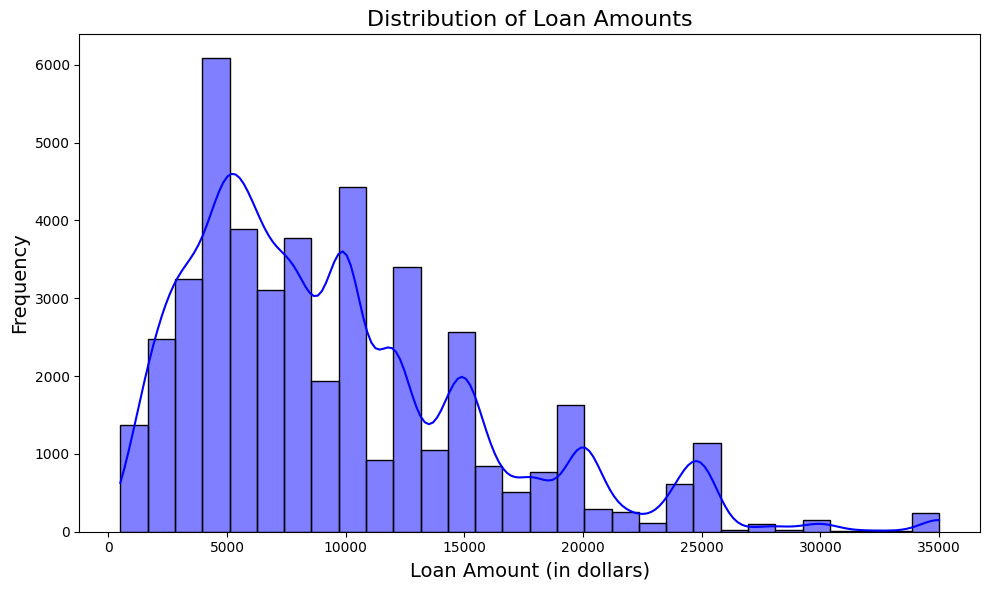

In [13]:
# @title Loan Amount Distribution

plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(data['loan_amnt'], bins=30, kde=True, color='blue')

# Add title and axis labels
plt.title("Distribution of Loan Amounts", fontsize=16)
plt.xlabel("Loan Amount (in dollars)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


A great number of loans are of an amount around 5000 dollars.

In [14]:
# Filter data for approved loans
approved_loans_data = data[data['loan_status'] == 1]
approved_loans_data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


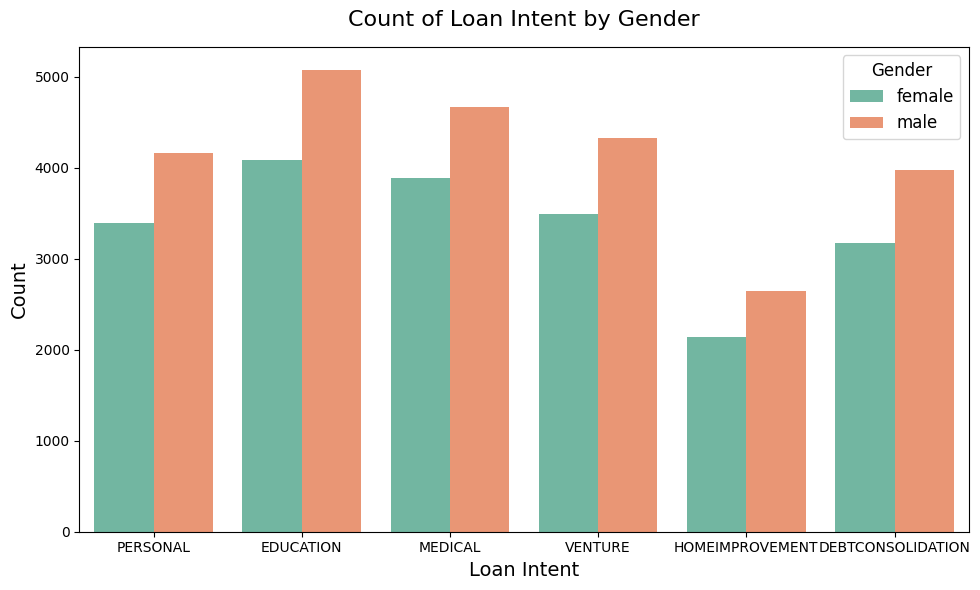

In [15]:
# @title Count of Loan Intent by Gender

# Define the specific order for loan_intent
loan_intent_order = ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION']


# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot showing counts for loan intent and gender
plot = sns.countplot(
    x="loan_intent",
    data=data,
    hue="person_gender",
    palette="Set2",
    order = loan_intent_order
)

# Add a descriptive title and labels
plt.title("Count of Loan Intent by Gender", fontsize=16, pad=15)
plt.xlabel("Loan Intent", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Gender", fontsize=12, title_fontsize=12)

# display the plot
plt.tight_layout()
plt.show()

Most of the loans are requested for educational purposes, and men consistently outnumber women in every loan intent category.

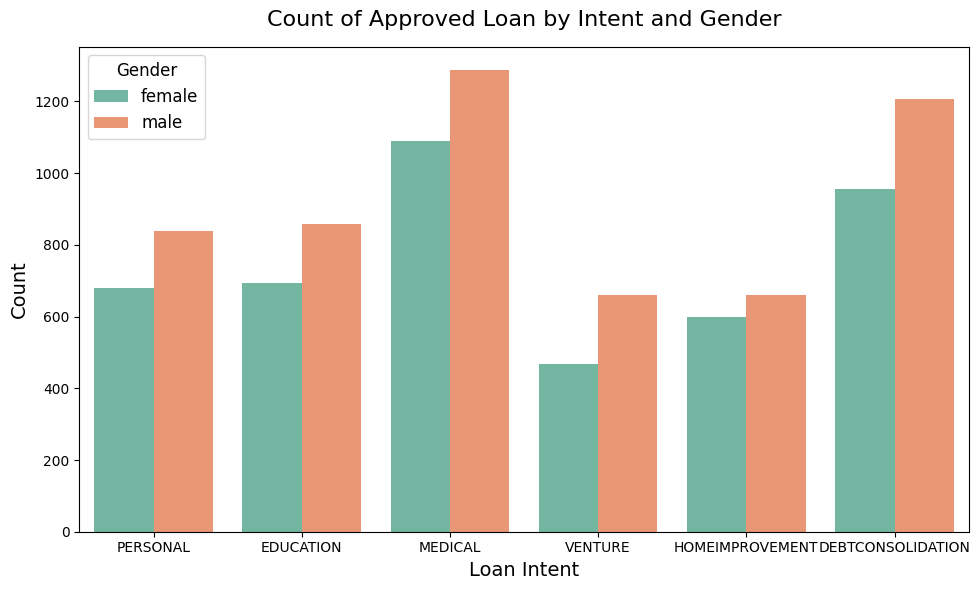

In [16]:
# @title Count of approved Loan by Intent and Gender

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot showing counts for loan intent and gender
plot = sns.countplot(
    x="loan_intent",
    data=approved_loans_data,
    hue="person_gender",
    palette="Set2",
    order = loan_intent_order
)

# Add a descriptive title and labels
plt.title("Count of Approved Loan by Intent and Gender", fontsize=16, pad=15)
plt.xlabel("Loan Intent", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Gender", fontsize=12, title_fontsize=12)

# display the plot
plt.tight_layout()
plt.show()

Most of the loans are approved for medical purposes, and men consistently outnumber women in every loan intent category.

<ipython-input-17-4238bfe8d27b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot5 = sns.catplot(
<ipython-input-17-4238bfe8d27b>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


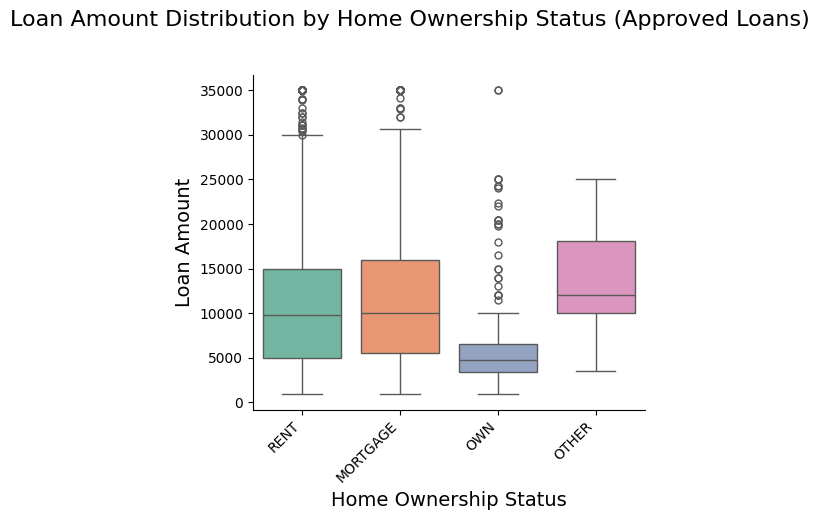

In [17]:
# @title Approved Loan Amount Distribution by Home Ownership Status

# Create a box plot for loan amount by home ownership status
plot5 = sns.catplot(
    y="loan_amnt", x="person_home_ownership",
    data=approved_loans_data, kind="box",
    palette="Set2"
)

# Add a descriptive title and axis labels
plot5.fig.suptitle("Loan Amount Distribution by Home Ownership Status (Approved Loans)", y=1.03, fontsize=16)
plot5.set_axis_labels("Home Ownership Status", "Loan Amount", fontsize=14)

# Rotate x-tick labels for better readability
for ax in plot5.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


The median loan amount is lowest for people who own their homes and highest for those with other types of home ownership. Those with rent or mortgage have nearly identical median loan amounts, while rent, mortgage and home ownership categories exhibit outliers.

<ipython-input-18-9c6ddb2c3d9b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot6 = sns.catplot(
<ipython-input-18-9c6ddb2c3d9b>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


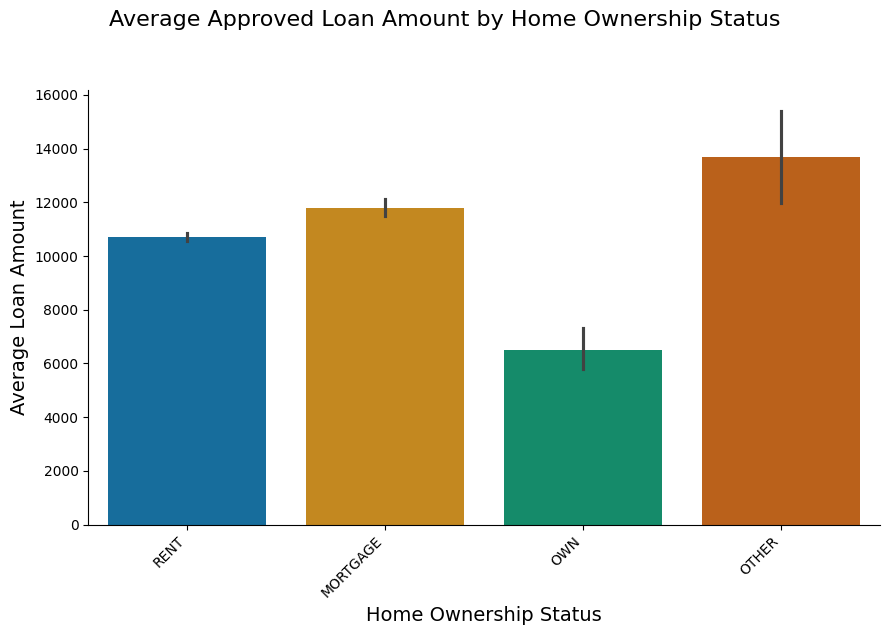

In [18]:
# @title Average Approved Loan Amount by Home Ownership Status

# Create the bar plot of loan amount by home ownership
plot6 = sns.catplot(
    y="loan_amnt", x="person_home_ownership",
    data=approved_loans_data, kind="bar",
    palette='colorblind', height=6, aspect=1.5
)

# Add title and axis labels
plot6.fig.suptitle("Average Approved Loan Amount by Home Ownership Status", fontsize=16, y=1.05)
plot6.set_axis_labels("Home Ownership Status", "Average Loan Amount", fontsize=14)

# Rotate x-tick labels for better readability
for ax in plot6.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

The average loan amount is highest for individuals with other types of home ownership, followed by those with a mortgage. Renters have a lower average loan amount, while those who fully own their homes have the lowest average loan amount.

In [19]:
approved_loans_for_education_data = approved_loans_data[approved_loans_data['loan_intent'] == 'EDUCATION']
approved_loans_for_education_data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
13,26.0,male,Master,130713.0,0,RENT,35000.0,EDUCATION,18.39,0.27,4.0,708,No,1
19,24.0,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,679,No,1
22,22.0,female,Master,79255.0,0,RENT,34000.0,EDUCATION,17.58,0.43,4.0,691,No,1
29,21.0,female,Bachelor,14988.0,0,OTHER,4000.0,EDUCATION,12.84,0.27,2.0,553,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44972,43.0,male,Associate,184295.0,20,MORTGAGE,25000.0,EDUCATION,20.00,0.14,15.0,720,No,1
44974,25.0,male,Associate,57363.0,1,RENT,12000.0,EDUCATION,9.98,0.21,3.0,653,No,1
44979,22.0,male,High School,35679.0,1,RENT,7455.0,EDUCATION,13.48,0.21,4.0,668,No,1
44991,24.0,male,High School,37786.0,0,MORTGAGE,13500.0,EDUCATION,13.43,0.36,4.0,612,No,1


<ipython-input-20-af6437d6b131>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


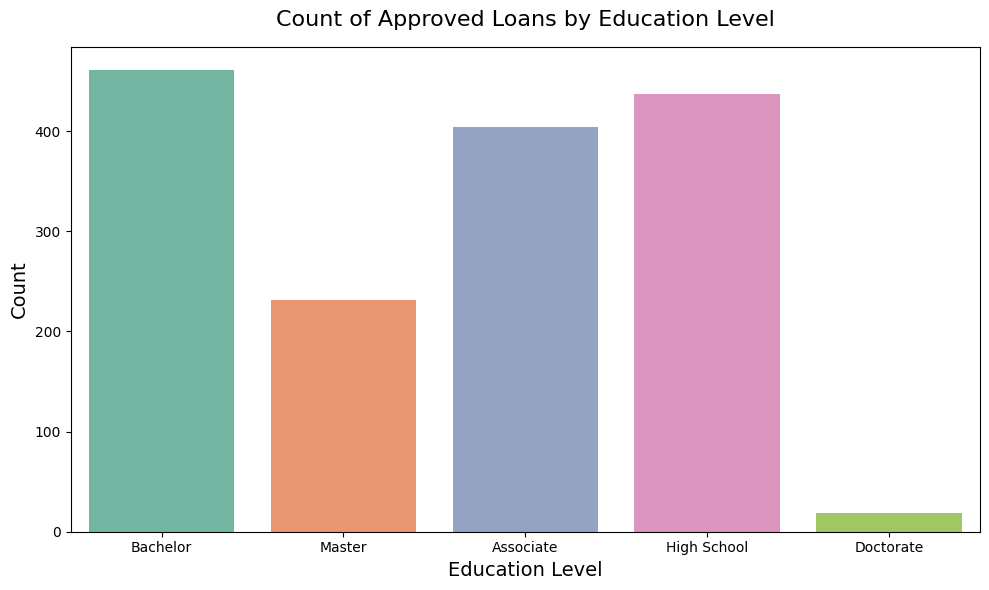

In [20]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for person_education
sns.countplot(
    x="person_education",
    data=approved_loans_for_education_data,
    palette="Set2"
)

# Add a descriptive title and labels
plt.title("Count of Approved Loans by Education Level", fontsize=16, pad=15)
plt.xlabel("Education Level", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Optimize layout and display the plot
plt.tight_layout()
plt.show()

Most of the approved loans for educational intent are granted to individuals with a bachelor's degree, while very few are approved for those with a doctorate.

## Decision Tree Classification

In [21]:
# Prepare the data
X = data.drop('loan_status', axis=1)  # Features
y = data['loan_status']  # Target

# Convert categorical features into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=50)
clf.fit(X_train, y_train)

# Predict classes and probabilities
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.8930370370370371


The model's accuracy score of 0.893 indicates that it correctly predicted the loan status for 89.3% of the test data.

In [22]:
# Display predictions and probabilities
print("Predicted Classes:")
print(y_pred[:10])  # Display the first 10 predictions
print("\nPredicted Class Probabilities:")
print(y_proba[:10])  # Display the first 10 probabilities

Predicted Classes:
[1 0 1 0 1 0 0 0 1 0]

Predicted Class Probabilities:
[[0.26556454 0.73443546]
 [1.         0.        ]
 [0.0093534  0.9906466 ]
 [1.         0.        ]
 [0.0093534  0.9906466 ]
 [0.77056596 0.22943404]
 [1.         0.        ]
 [0.77056596 0.22943404]
 [0.0093534  0.9906466 ]
 [0.77056596 0.22943404]]



The predicted classes and their corresponding probabilities reveal how confidently the decision tree model classifies each test sample as either "Approved" (1) or "Denied" (0). For the first prediction, the model is more likely to approve the loan, with a 73.44% probability of approval and only a 26.56% probability of denial. In contrast, the second prediction is made with full certainty, where the model predicts the loan will be denied with 100% certainty. Similarly, for the third prediction, the model is highly confident in approving the loan, with a probability of 99.06% for approval and just 0.94% for denial, an so on.

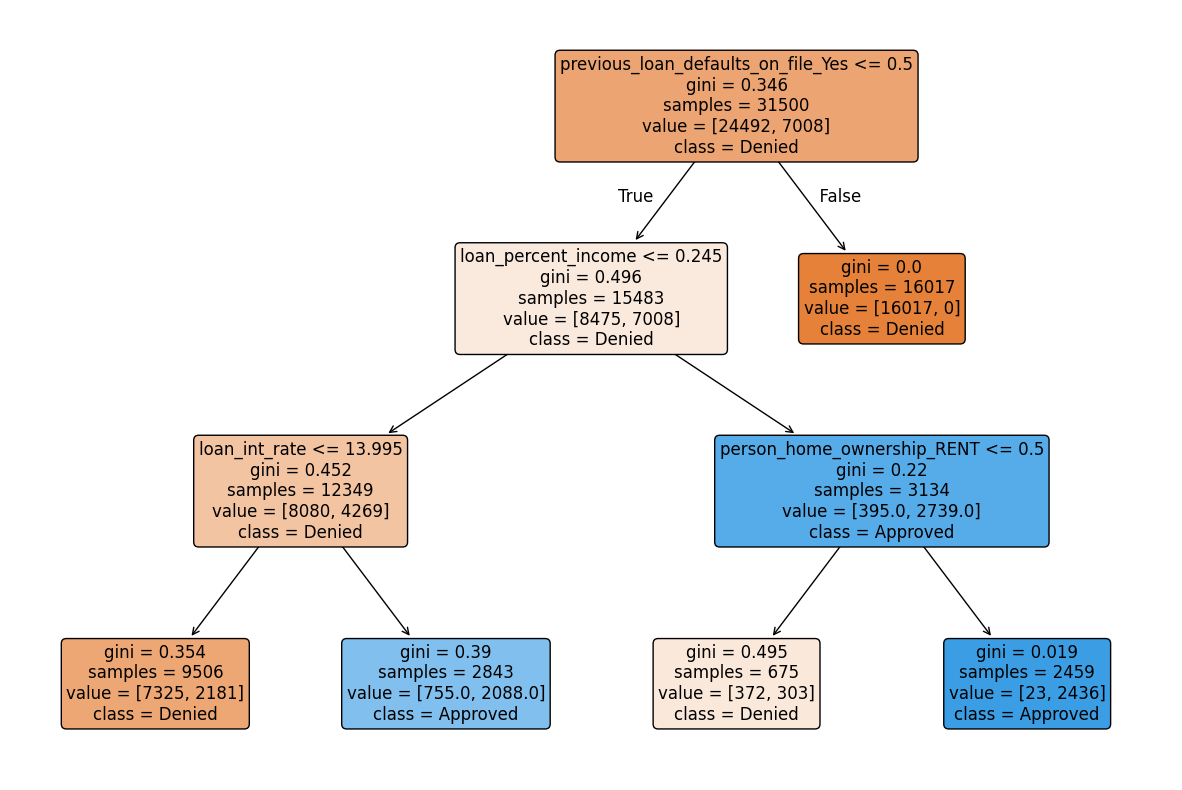

In [23]:
# @title Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Denied', 'Approved'], filled=True, rounded=True, fontsize=12)
plt.show()


The decision tree's root node splits based on whether an applicant has a previous loan default on file. Applicants who have a default are further split by their loan-to-income ratio (loan_percent_income <= 0.245). The left child node, where previous loan defaults are present, exhibits more uncertainty, with a higher Gini impurity of 0.496 and a more balanced distribution of denied (8,475) and approved (7,008) loans. In contrast, the right child node, where no previous loan default is recorded, results in a perfect prediction, with 16,017 denied loans and a Gini impurity of 0.0, meaning all applicants in this group are predicted as denied.

The left branch of the node with a Gini impurity of 0.496 further splits applicants based on the loan interest rate (loan_int_rate <= 13.9). Those with an interest rate lower than or equal to 13.9% (12,349 samples) are predominantly classified as denied, though there remains some uncertainty with a Gini value of 0.452. The right child node, which splits based on homeownership status (person_home_hownership_rent <= 0.5), shows a strong likelihood of loan approval, indicated by a Gini impurity of 0.22. In this node, 3,134 samples are classified with 2,739 approved loans and 395 denied loans.

For the left child node where loan_int_rate <= 13.9, the decision tree continues to refine its predictions. This node has 12,349 samples, with 8,080 denials and 4,269 approvals, primarily classifying applicants as denied. The left child of this node, representing applicants with a loan interest rate of 13.9% or less, has a Gini index of 0.354. Out of 9,506 samples, 7,325 are denied, and 2,181 are approved, showing a strong tendency to deny loans, though there is still some uncertainty due to the non-zero Gini value.

On the right side, for applicants with a loan interest rate greater than 13.9%, the tree is more likely to approve the loan, with a Gini index of 0.39. In this node, there are 2,843 samples, with 755 denials and 2,088 approvals, making it more likely to classify these individuals as approved.

Additionally, the right child of the node with a Gini value of 0.22 is split further by homeownership status. For those who do not have "rent" as their ownership status, the Gini index is very low at 0.019, and the node has 3,134 samples, with 2,436 approvals and only 23 denials, indicating a strong likelihood of approval. Conversely, for those who are renting, the Gini impurity is 0.495 with 675 samples, comprising 372 denied loans and 303 approved loans, reflecting more uncertainty in the classification.

## Logistic Regression Model

In [24]:
# @title Correlation Matrix
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Print correlation matrix
correlation_matrix

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000


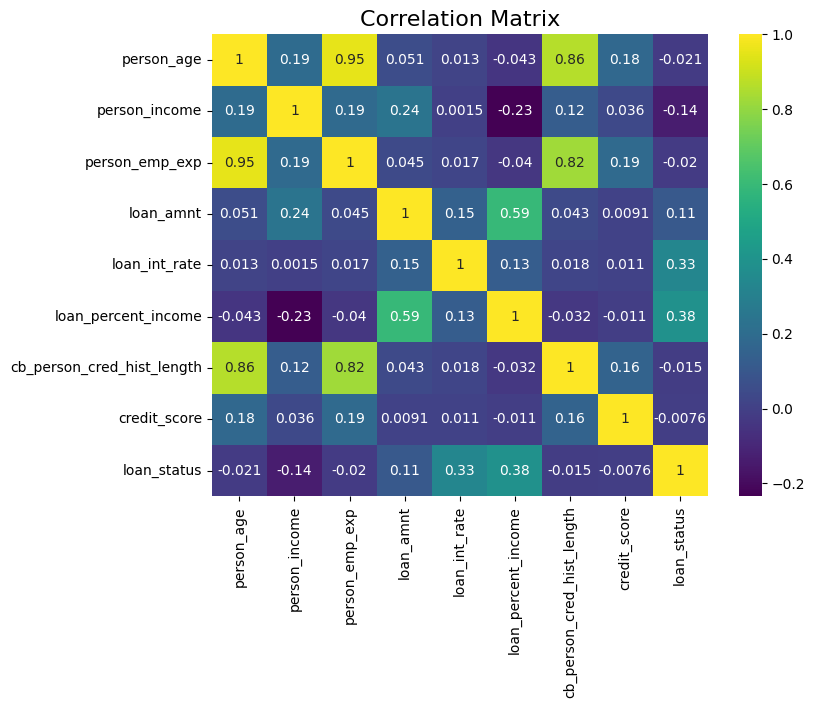

In [25]:
# Define figure size
plt.figure(figsize=(8, 6))
# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

# Add title
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()

In [26]:
# Define the target variable and features
X = data[['person_income', 'loan_percent_income', 'loan_int_rate']]  # Features

y = data['loan_status']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=30)

# Train the model
log_reg.fit(X_train, y_train)

# Predict the target for the test set
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[::, 1]  # Probability of the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Display results
print("Accuracy Score:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nROC-AUC Score:", roc_auc)


Accuracy Score: 0.8257037037037037

Confusion Matrix:
 [[9944  556]
 [1797 1203]]

ROC-AUC Score: 0.828251873015873


Accuracy= 0.8257; This means 82.57% of predictions made by the model are correct.
The ROC-AUC score of 0.83 indicates the model's strong ability to distinguish between the two classes.

In [27]:
# Display class predictions and probabilities
print("Predicted Classes:\n", y_pred)
print("\nPredicted Class Probabilities:\n", log_reg.predict_proba(X_test))


Predicted Classes:
 [1 0 1 ... 0 0 0]

Predicted Class Probabilities:
 [[0.49302736 0.50697264]
 [0.97369517 0.02630483]
 [0.12902158 0.87097842]
 ...
 [0.94520152 0.05479848]
 [0.78399204 0.21600796]
 [0.93910986 0.06089014]]


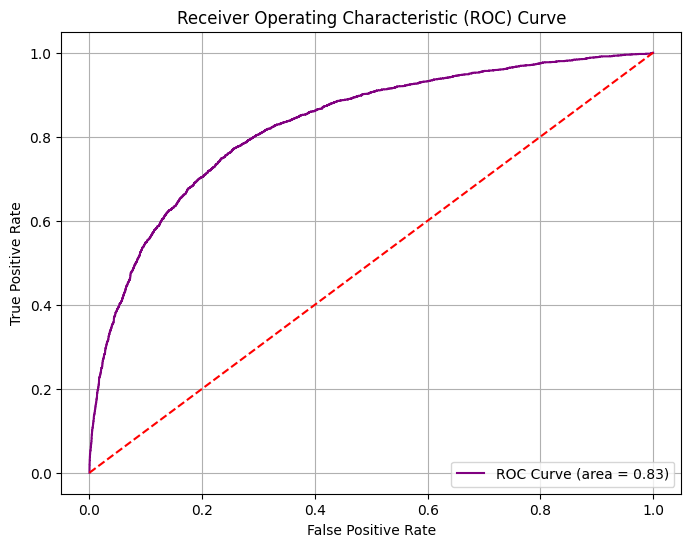

In [28]:
# @title Curve
# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [29]:
# Train One-vs-All Logistic Regression
ova_model = OneVsRestClassifier(log_reg)
ova_model.fit(X_train, y_train)
ova_preds = ova_model.predict(X_test)

# Train One-vs-One Logistic Regression
ovo_model = OneVsOneClassifier(log_reg)
ovo_model.fit(X_train, y_train)
ovo_preds = ovo_model.predict(X_test)

# Evaluate OvA
print("One-vs-All Accuracy:", accuracy_score(y_test, ova_preds))

# Evaluate OvO
print("One-vs-One Accuracy:", accuracy_score(y_test, ovo_preds))


One-vs-All Accuracy: 0.8257037037037037
One-vs-One Accuracy: 0.8257037037037037


The accuracy results for both the One-vs-All (82.57%) and One-vs-One (82.57%) strategies indicate that both models are performing equally well on the dataset.